In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew

In [2]:
ipl_df = pd.read_csv('~/Desktop/data2/match_info_data.csv')

In [3]:
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin


In [4]:
column= ipl_df.columns

In [5]:
column

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
ipl_df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [7]:
ipl_df.shape

(1024, 18)

In [8]:
len(ipl_df.columns)

18

In [9]:
ipl_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,1.024000e+03,1024.000000,1024.000000,1024.000000
mean,8.687579e+05,0.020508,13.610352,3.286133
std,3.528920e+05,0.141799,23.443273,3.375659
min,3.359820e+05,0.000000,0.000000,0.000000
25%,5.483138e+05,0.000000,0.000000,0.000000
50%,8.298140e+05,0.000000,0.000000,3.000000
75%,1.216503e+06,0.000000,19.000000,6.000000
max,1.370353e+06,1.000000,146.000000,10.000000


In [10]:
ipl_df.dtypes


id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [11]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [12]:
ipl_df.dropna(inplace=True)


In [13]:

le = LabelEncoder()
for col in ipl_df.select_dtypes(include=['object']):
  ipl_df[col] = le.fit_transform(ipl_df[col])



In [14]:
ipl_df.fillna(ipl_df.median(), inplace=True)  


In [15]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               954 non-null    int64
 1   season           954 non-null    int64
 2   city             954 non-null    int64
 3   date             954 non-null    int64
 4   team1            954 non-null    int64
 5   team2            954 non-null    int64
 6   toss_winner      954 non-null    int64
 7   toss_decision    954 non-null    int64
 8   result           954 non-null    int64
 9   dl_applied       954 non-null    int64
 10  winner           954 non-null    int64
 11  win_by_runs      954 non-null    int64
 12  win_by_wickets   954 non-null    int64
 13  player_of_match  954 non-null    int64
 14  venue            954 non-null    int64
 15  umpire1          954 non-null    int64
 16  umpire2          954 non-null    int64
 17  umpire3          954 non-null    int64
dtypes: int64(18)
m

In [16]:
def calculate_run_score(row):
  winner = row['winner']
  if pd.isna(winner):  
    return np.nan  

  if row['result'] == 'normal':
    if winner == row['team1']:
      return row['win_by_runs']
    else:
     
      return np.nan  
  else:
    
    return np.nan  


In [17]:
ipl_df['run_score'] = ipl_df.apply(calculate_run_score, axis=1)


In [18]:
ipl_df['run_score'] = ipl_df['run_score'].fillna(-1)


In [19]:
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,run_score
0,1370353,15,1,715,5,0,0,1,0,1,0,0,5,59,30,37,42,33,-1.0
1,1370352,15,1,714,5,10,10,1,1,0,5,62,0,251,30,37,42,26,-1.0
2,1370351,15,8,713,10,9,10,0,1,0,10,81,0,26,27,11,59,15,-1.0
3,1370350,15,8,712,0,5,5,1,1,0,0,15,0,202,27,3,12,12,-1.0
4,1359543,15,25,711,17,10,10,1,1,0,10,0,8,40,54,30,42,45,-1.0


In [20]:
venue_wins = ipl_df.groupby(['team1', 'venue']).size().unstack(fill_value=0)
venue_wins = venue_wins.add(ipl_df.groupby(['team2', 'venue']).size().unstack(fill_value=0), fill_value=0)


In [21]:
venue_wins

venue,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
team1,,,,,,,,,,,,,,,,,,,,,
0,2,3,1,0,0,1,4,1,1,4,...,1,2,6,2,2,3,1,14,10,2
1,0,0,4,0,0,1,0,1,2,6,...,0,0,0,1,1,4,3,2,0,0
2,6,7,0,1,1,0,4,0,0,0,...,0,3,5,0,0,0,0,1,8,1
3,7,0,1,0,0,2,0,1,0,2,...,6,0,1,1,3,4,0,8,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
5,0,1,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,5,0
6,2,0,3,0,0,1,0,0,1,1,...,0,0,6,1,2,2,0,11,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,1,1,3,0,0,2,3,1,0,2,...,1,4,9,2,3,2,0,9,7,3


In [22]:
grouped_data = ipl_df.groupby(['season', 'city'])['winner'].value_counts()



In [23]:
grouped_data

season  city  winner
0       2     0         1
              16        1
              13        1
              10        1
              8         1
                       ..
15      24    12        1
              5         1
        25    10        5
              0         1
              12        1
Name: count, Length: 567, dtype: int64

In [24]:
grouped_data

season  city  winner
0       2     0         1
              16        1
              13        1
              10        1
              8         1
                       ..
15      24    12        1
              5         1
        25    10        5
              0         1
              12        1
Name: count, Length: 567, dtype: int64

In [25]:
most_played_stadium_info = ipl_df.groupby('venue').apply(lambda x: x[['date', 'winner']].iloc[0])

In [26]:
most_played_stadium_info

,date,winner
venue,,
0,523,2
1,710,0
2,289,8
3,668,13
4,706,9
5,338,13
6,653,13
7,63,3
8,66,1


In [27]:
x = ipl_df.iloc[:, 1:-1].values  
y = ipl_df.iloc[:, -1].values    


In [28]:
y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [29]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [31]:
x_train

array([[ 0.54972315, -1.33306806,  0.63516545, ..., -1.02970832,
         0.6707049 , -0.94426692],
       [-1.37050588,  1.27147632, -1.45243487, ..., -0.77714585,
         0.89195402,  0.59224928],
       [-0.94378832,  0.64638567, -0.942672  , ...,  1.55905703,
         0.44945577,  1.16844286],
       ...,
       [-1.37050588,  1.27147632, -1.35533718, ..., -0.65086461,
        -1.4311618 , -0.41608947],
       [ 0.12300559, -0.60379563,  0.10112816, ...,  0.48566652,
        -0.32491617,  0.9283622 ],
       [ 1.40315827,  1.37565809,  1.40709208, ..., -1.21913018,
        -0.38022845,  0.06407184]])

In [32]:
result_stats = ipl_df.groupby('result')[['winner', 'win_by_runs', 'win_by_wickets']].first()


In [33]:
result_stats

,winner,win_by_runs,win_by_wickets
result,,,
0,0,0,5
1,5,62,0


In [34]:
grouped_data = ipl_df.groupby(['player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']).size()


In [35]:
grouped_data

player_of_match  venue  umpire1  umpire2  umpire3
0                44     9        51       65         1
1                9      41       50       53         1
                 26     17       19       13         1
                 32     41       50       17         1
2                30     3        1        15         1
                                                    ..
273              21     21       46       57         1
                 22     28       42       53         1
                 32     47       40       19         1
                 40     6        34       0          1
274              46     43       58       53         1
Length: 952, dtype: int64

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
y_pred_lr = lr.predict(x_test)


In [39]:
y_pred_lr

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [40]:
lr_mse = mean_squared_error(y_test, y_pred_lr)


In [41]:
lr_mse

0.0

In [42]:
summary_table = pd.DataFrame({
    'Feature': ipl_df.columns[1:-1],  
    'Mean': x.mean(axis=0),
    'Standard Deviation': x.std(axis=0),
    'Skewness': skew(x, axis=0),
})


In [43]:
summary_table

,Feature,Mean,Standard Deviation,Skewness
0,season,7.423480,4.686941,0.106584
1,city,15.795597,9.598608,-0.030816
2,date,344.169811,205.978125,0.108337
3,team1,8.537736,5.597351,-0.045778
4,team2,8.605870,5.422583,-0.032853
5,toss_winner,8.313417,5.530674,0.008550
6,toss_decision,0.640461,0.479865,-0.585419
7,result,0.977987,0.146724,-6.515449
8,dl_applied,0.022013,0.146724,6.515449
9,winner,8.494759,5.526615,-0.059422


In [44]:
correlation_coefficients = np.corrcoef(x_scaled.T, y)


/Users/vijaygupta/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/vijaygupta/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [45]:
summary_table['Correlation with Target'] = correlation_coefficients[:-1, -1]


In [46]:
summary_table

,Feature,Mean,Standard Deviation,Skewness,Correlation with Target
0,season,7.423480,4.686941,0.106584,NaN
1,city,15.795597,9.598608,-0.030816,NaN
2,date,344.169811,205.978125,0.108337,NaN
3,team1,8.537736,5.597351,-0.045778,NaN
4,team2,8.605870,5.422583,-0.032853,NaN
5,toss_winner,8.313417,5.530674,0.008550,NaN
6,toss_decision,0.640461,0.479865,-0.585419,NaN
7,result,0.977987,0.146724,-6.515449,NaN
8,dl_applied,0.022013,0.146724,6.515449,NaN
9,winner,8.494759,5.526615,-0.059422,NaN


In [47]:
season_winner = ipl_df.groupby('season')['winner'].first()


In [48]:
season_winner

season
0     13
1      1
2      0
3      0
4      8
5     10
6      8
7     10
8     17
9     10
10     0
11    10
12     2
13     0
14     5
15     0
Name: winner, dtype: int64

In [49]:
grouped_data = ipl_df.groupby(['player_of_match', 'venue', 'team1', 'team2'])['win_by_runs'].sum()


In [50]:
grouped_data

player_of_match  venue  team1  team2
0                44     13     11       45
1                9      16     1         0
                 26     0      16       14
                 32     16     1         6
2                30     5      10       55
                                        ..
273              21     16     6         8
                 22     16     3        16
                 32     1      6         1
                 40     17     16       35
274              46     3      0         0
Name: win_by_runs, Length: 922, dtype: int64

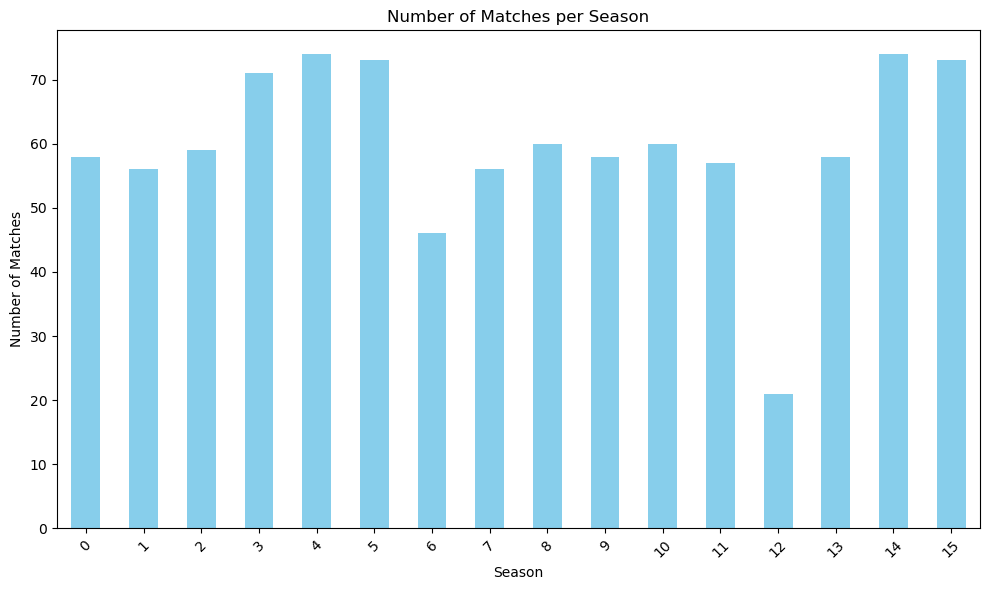

In [51]:
plt.figure(figsize=(10, 6))
ipl_df['season'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

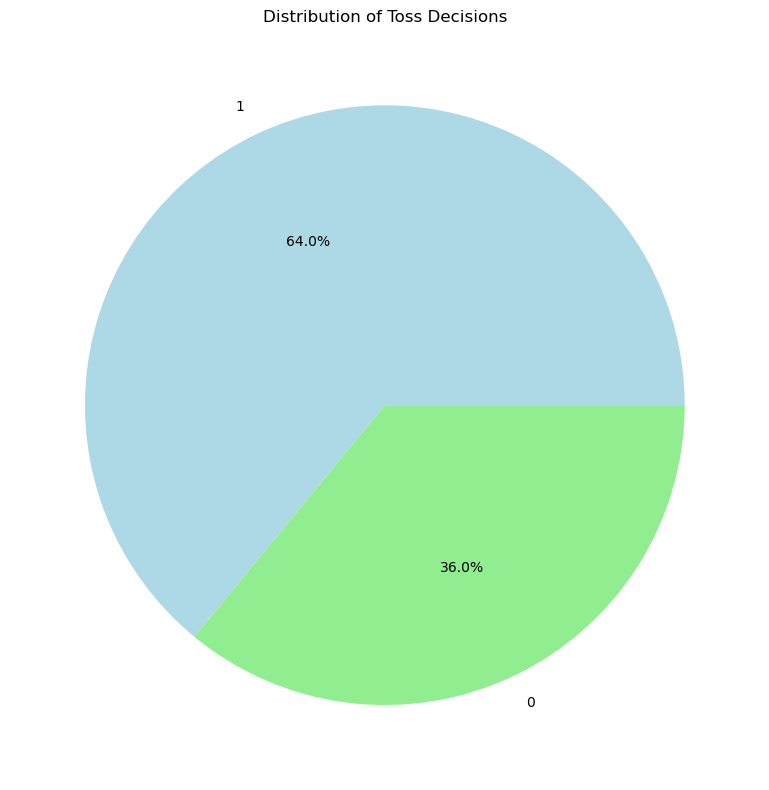

In [52]:
plt.figure(figsize=(8, 8))
ipl_df['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Toss Decisions')
plt.ylabel('')
plt.tight_layout()
plt.show()


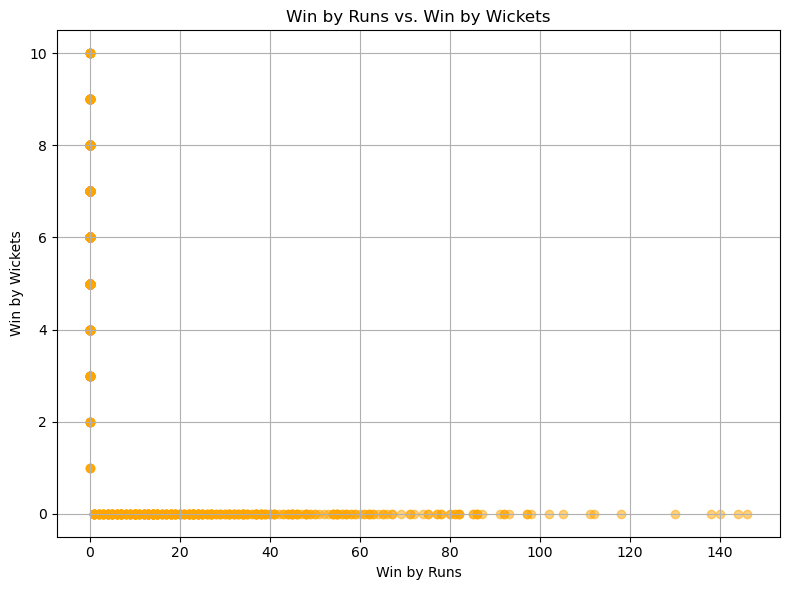

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(ipl_df['win_by_runs'], ipl_df['win_by_wickets'], alpha=0.5, color='orange')
plt.title('Win by Runs vs. Win by Wickets')
plt.xlabel('Win by Runs')
plt.ylabel('Win by Wickets')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
city_most_winning_team = ipl_df.groupby(['city', 'winner']).size().groupby('city').idxmax()
most_winning_team_counts = city_most_winning_team.groupby('city').count()


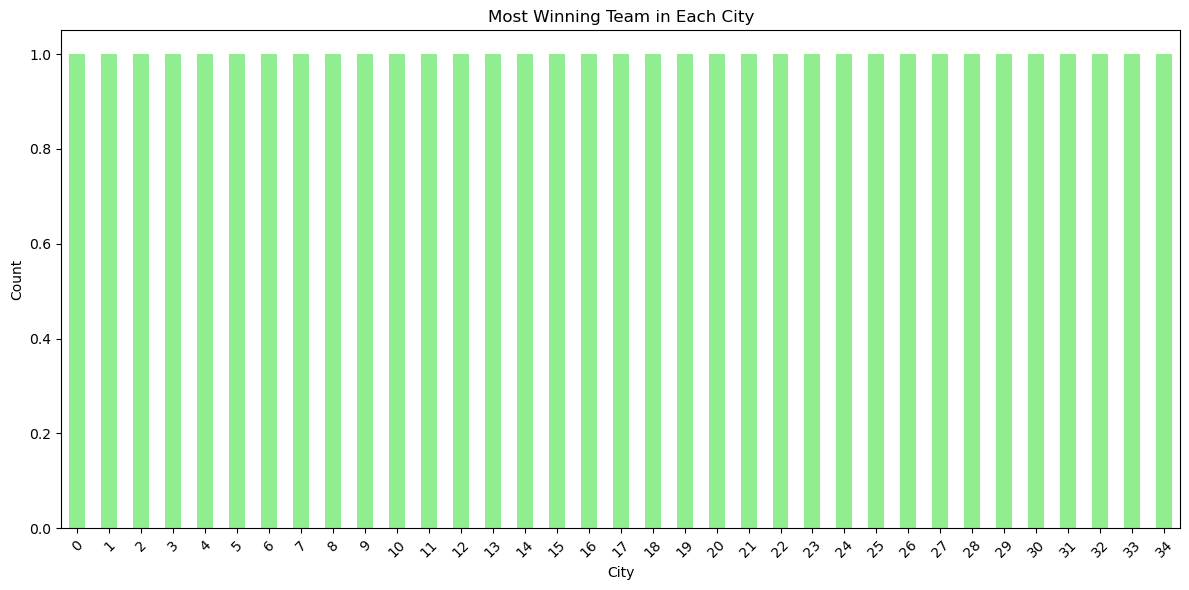

In [55]:
plt.figure(figsize=(12, 6))
most_winning_team_counts.plot(kind='bar', color='lightgreen')
plt.title('Most Winning Team in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

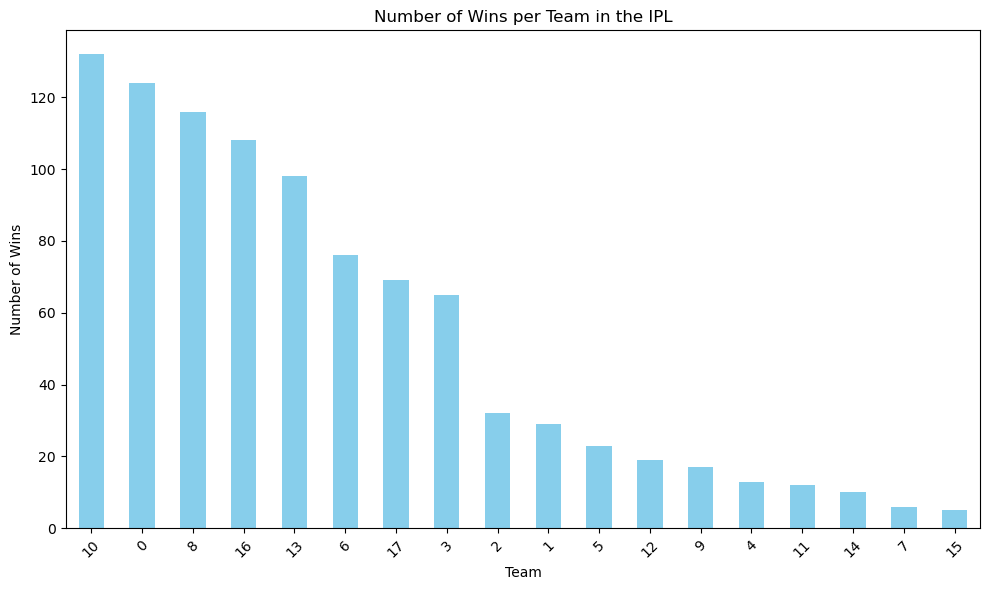

In [56]:
wins_per_team = ipl_df['winner'].value_counts()

plt.figure(figsize=(10, 6))
wins_per_team.plot(kind='bar', color='skyblue')
plt.title('Number of Wins per Team in the IPL')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

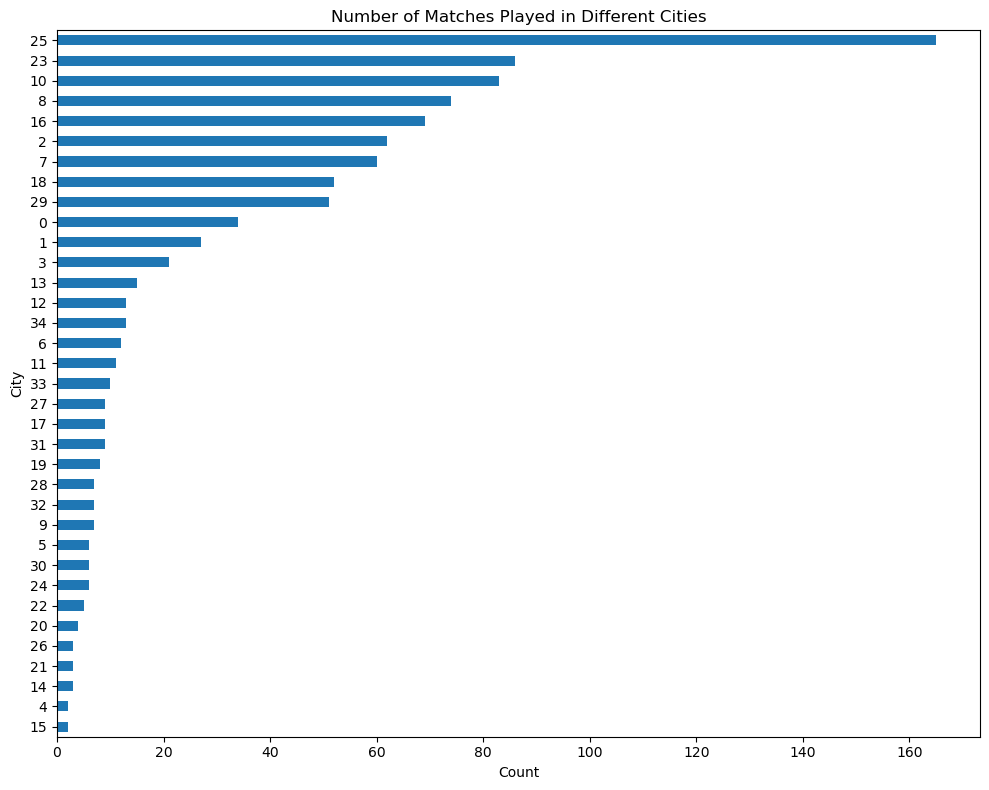

In [79]:
plt.figure(figsize=(10, 8))
matches_per_city = ipl_df['city'].value_counts()
matches_per_city.index.name = 'City'  # Set the name of the index to 'City'
matches_per_city.plot(kind='barh')
plt.title('Number of Matches Played in Different Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Invert y-axis to display the city with the highest count at the top
plt.tight_layout()
plt.show()

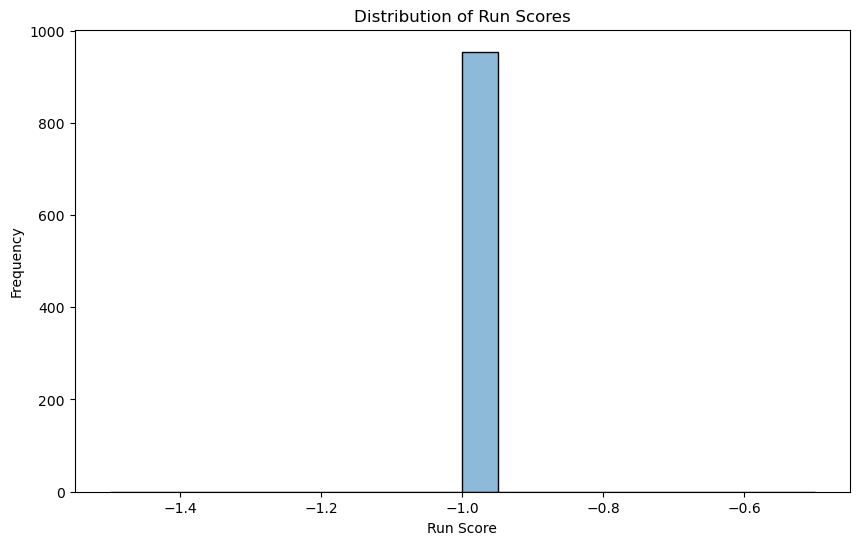

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ipl_df, x='run_score', bins=20, kde=True)
plt.title('Distribution of Run Scores')
plt.xlabel('Run Score')
plt.ylabel('Frequency')
plt.show()

In [55]:
venue_counts = ipl_df['venue'].value_counts().sort_values(ascending=False)


In [56]:
top_venues = venue_counts.head(10)

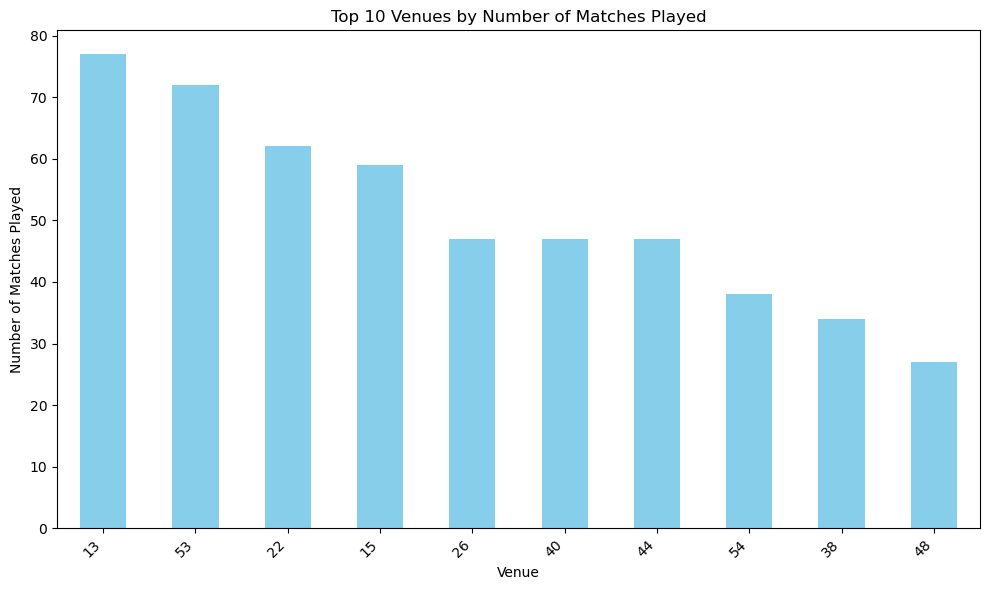

In [57]:
plt.figure(figsize=(10, 6))
top_venues.plot(kind='bar', color='skyblue')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Venue')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
city_counts = ipl_df['city'].value_counts().sort_values(ascending=False)


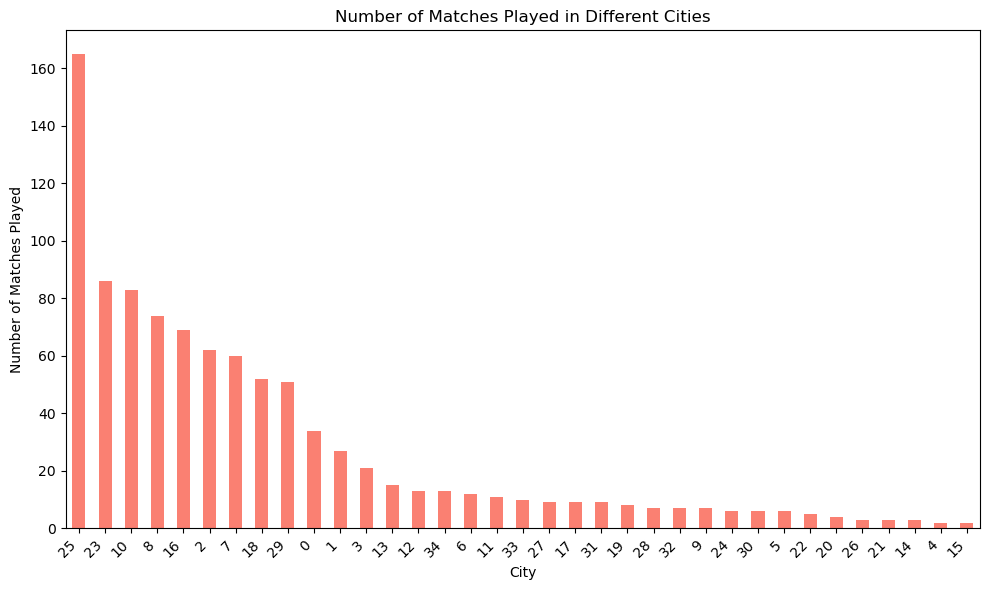

In [59]:
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='salmon')
plt.title('Number of Matches Played in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
ipl_df['year'] = pd.to_datetime(ipl_df['date']).dt.year


In [61]:
season_counts = ipl_df['year'].value_counts().sort_index()


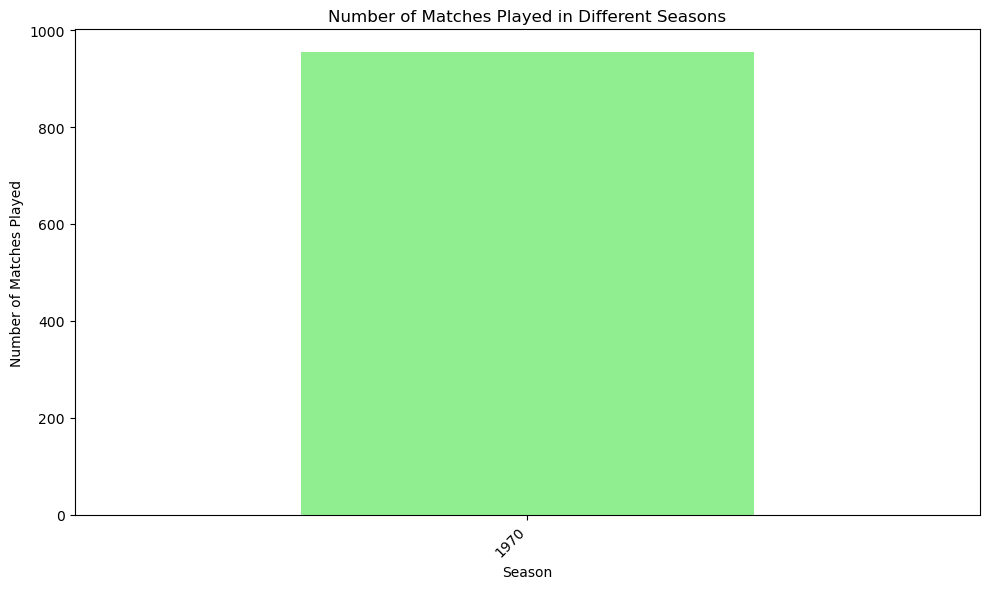

In [66]:
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Matches Played in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

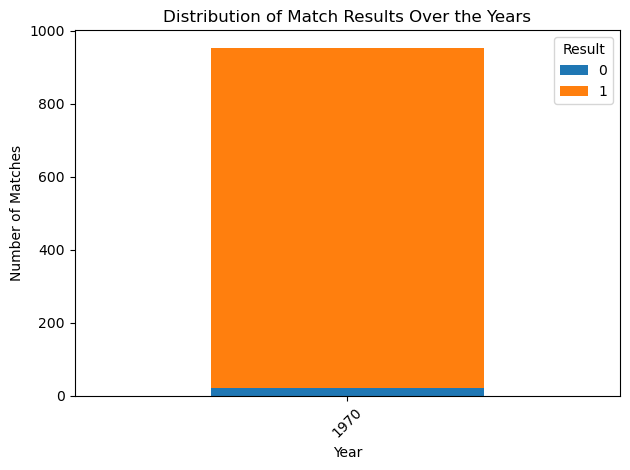

In [81]:
ipl_df['year'] = pd.to_datetime(ipl_df['date']).dt.year

year_result_counts = ipl_df.groupby(['year', 'result']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
year_result_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Match Results Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

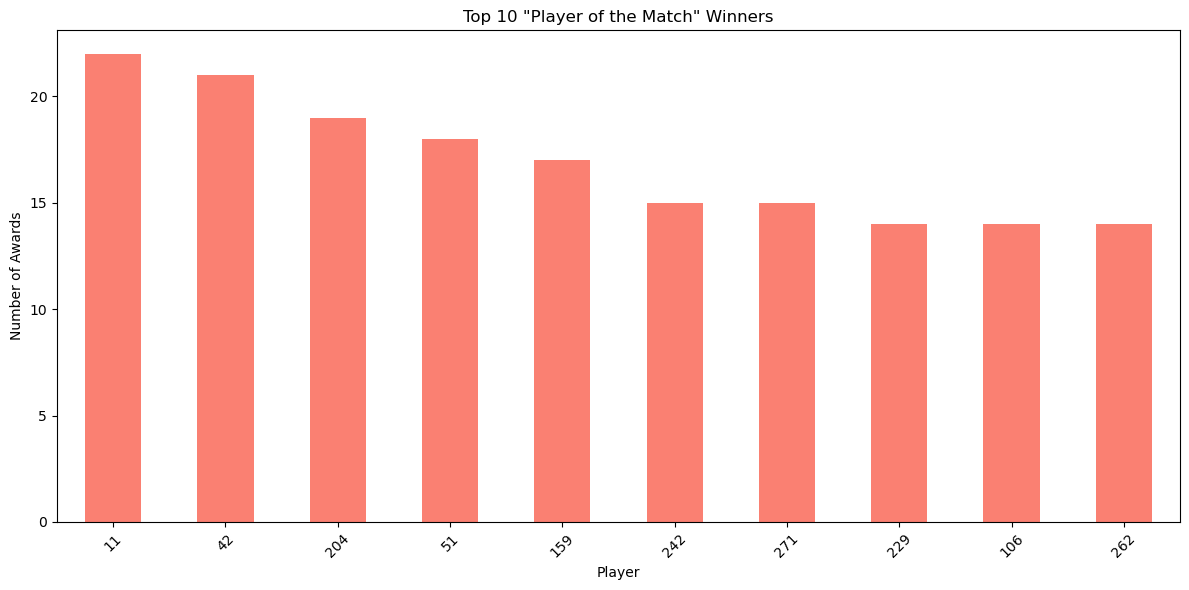

In [83]:
player_of_match_counts = ipl_df['player_of_match'].value_counts().head(10)  # Top 10 players

# Plotting
plt.figure(figsize=(12, 6))
player_of_match_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 "Player of the Match" Winners')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

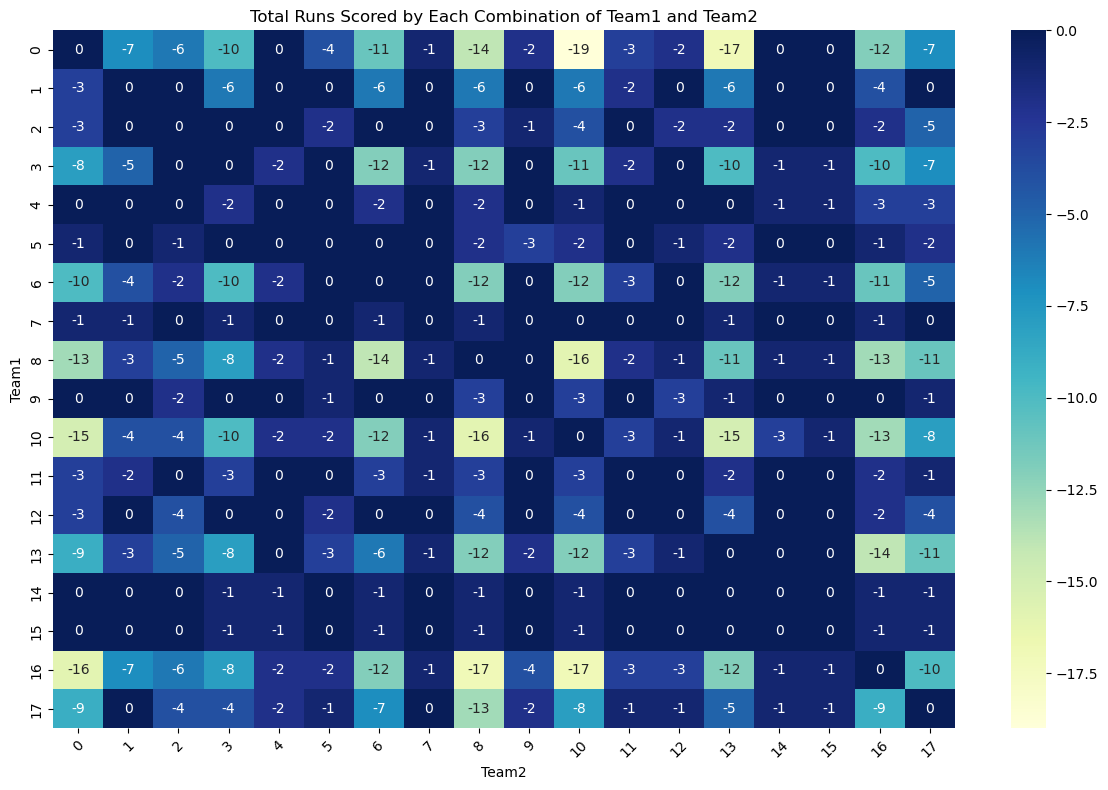

In [100]:
total_runs_by_teams = ipl_df.groupby(['team1', 'team2'])['run_score'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(total_runs_by_teams, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Total Runs Scored by Each Combination of Team1 and Team2')
plt.xlabel('Team2')
plt.ylabel('Team1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
ipl_df['year'] = pd.to_datetime(ipl_df['date']).dt.year

yearly_total_runs = ipl_df.groupby('year')['run_score'].sum()


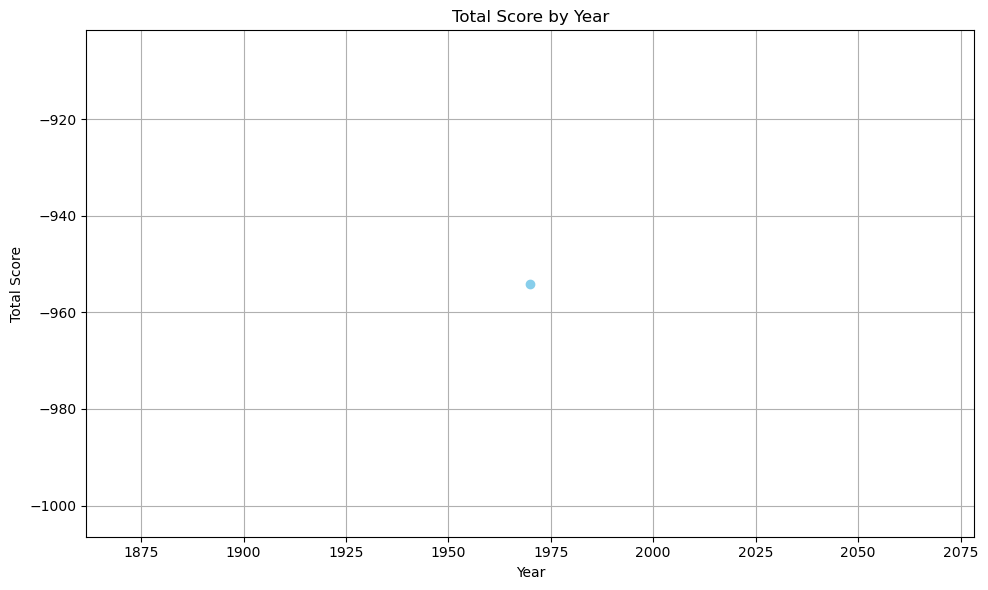

In [103]:
plt.figure(figsize=(10, 6))
yearly_total_runs.plot(marker='o', color='skyblue', linestyle='-')
plt.title('Total Score by Year')
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.grid(True)
plt.tight_layout()
plt.show()

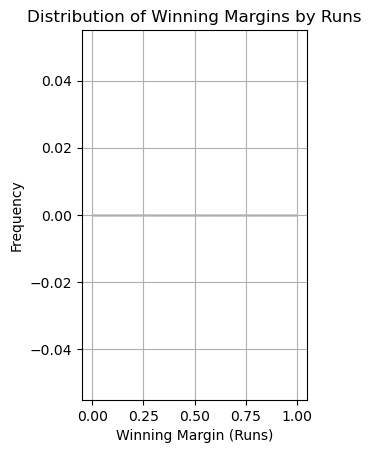

In [107]:
runs_win_matches = ipl_df[ipl_df['result'] == 'runs']
plt.subplot(1, 2, 1)
plt.hist(runs_win_matches['win_by_runs'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Winning Margins by Runs')
plt.xlabel('Winning Margin (Runs)')
plt.ylabel('Frequency')
plt.grid(True)

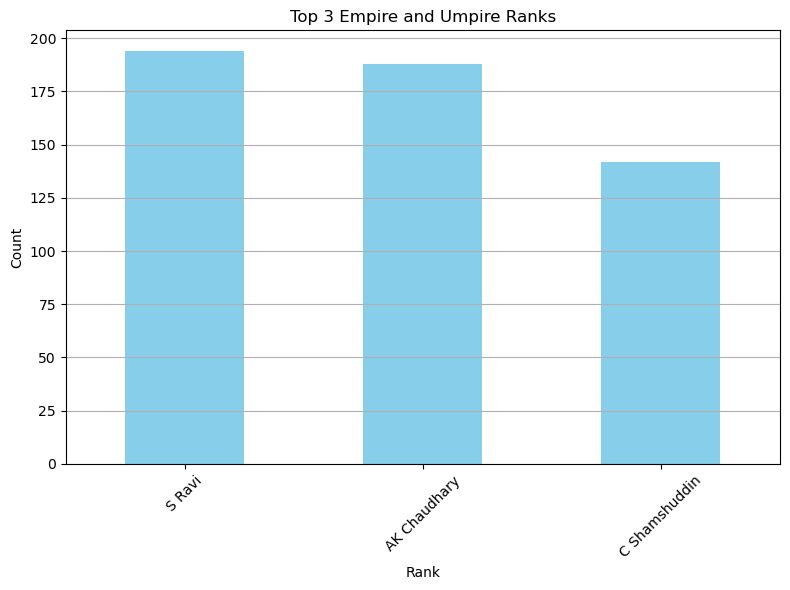

In [11]:
umpires_series = pd.concat([ipl_df['umpire1'], ipl_df['umpire2'], ipl_df['umpire3']])
top_3_ranks = umpires_series.value_counts().head(3)
plt.figure(figsize=(8, 6))
top_3_ranks.plot(kind='bar', color='skyblue')
plt.title('Top 3 Empire and Umpire Ranks')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


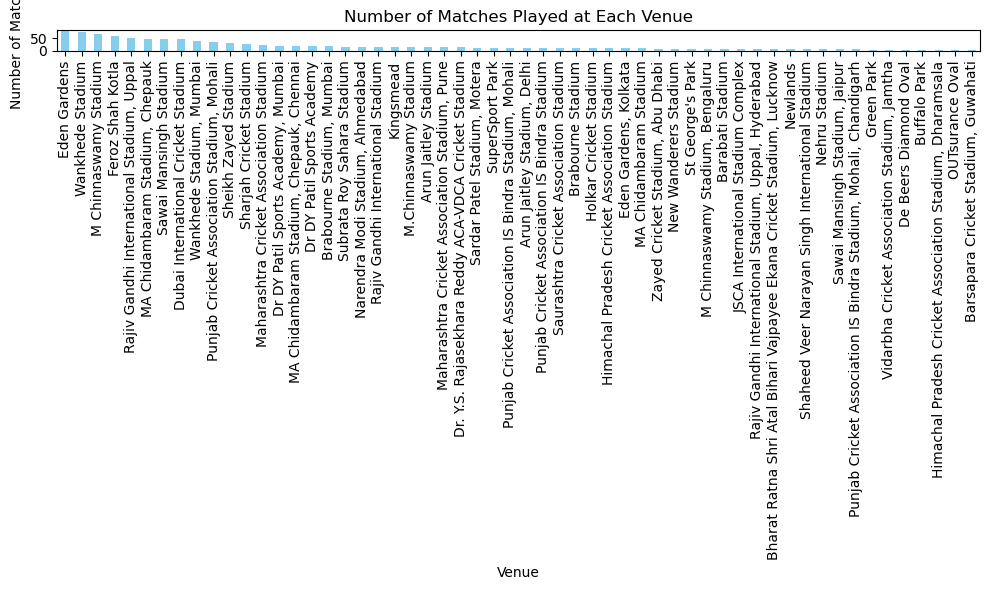

In [24]:
venue_matches_count = ipl_df['venue'].value_counts()
plt.figure(figsize=(10, 6))
venue_matches_count.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
player_of_match_counts = ipl_df.groupby(['season', 'team1', 'player_of_match'])['player_of_match'].count().reset_index(name='count')

player_of_match_by_team = player_of_match_counts.groupby(['season', 'team1'])['count'].sum().reset_index()

player_of_match_pivot = player_of_match_by_team.pivot(index='season', columns='team1', values='count').fillna(0)


<Figure size 1200x800 with 0 Axes>

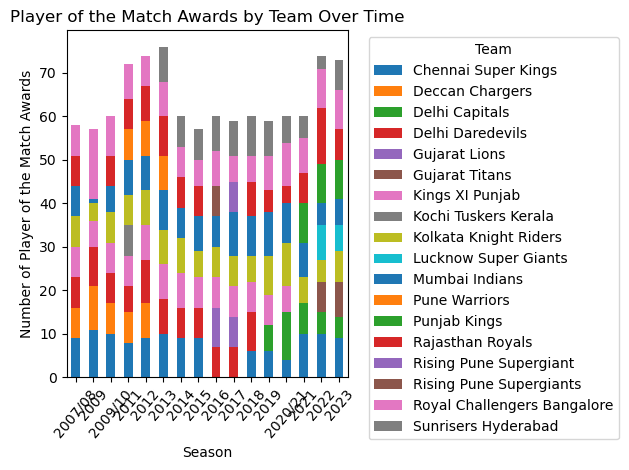

In [27]:
plt.figure(figsize=(12, 8))
player_of_match_pivot.plot(kind='bar', stacked=True)
plt.title('Player of the Match Awards by Team Over Time')
plt.xlabel('Season')
plt.ylabel('Number of Player of the Match Awards')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()